## Outlier Analysis with Single Sample

In [1]:
import seaborn as sns
diamonds =sns.load_dataset('diamonds')
df = diamonds.copy()
df = df.select_dtypes(include = ['float64', 'int64'])
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df['table'].copy()

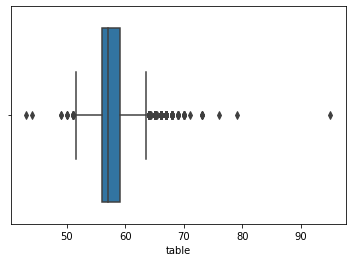

In [3]:
sns.boxplot(df_table);

In [4]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1
below_limit = Q1 - (1.5+IQR)
above_limit = Q3 + (1.5 + IQR)
print('below limit : ',below_limit)
print('above limit : ',above_limit)

below limit :  51.5
above limit :  63.5


In [5]:
(df_table < (below_limit)) | (df_table > (above_limit))

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [6]:
outlier_tf = df_table < (below_limit)
outlier_tf[0:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: table, dtype: bool

In [7]:
df_table[outlier_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [8]:
df_table[outlier_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

## Solving Outlier Value Problem

In [9]:
import pandas as pd
import numpy as np

In [10]:
# deleting outliers

In [11]:
df_table = df_table.values.reshape(-1,1)

In [12]:
clean_df_table = df_table[~((df_table < (below_limit)) | (df_table > (above_limit))).any(axis = 1)]

In [13]:
clean_df_table.shape

(53335, 1)

In [14]:
# filling with means

In [15]:
df_table = df['table'].copy()

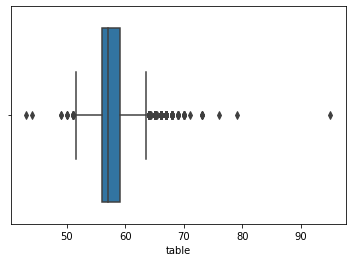

In [16]:
sns.boxplot(df_table);

In [17]:
df_table[outlier_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [18]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [19]:
outlier_tf = (df_table < (below_limit)) | (df_table > (above_limit))

In [20]:
df_table[outlier_tf] = df_table.mean()

In [21]:
df_table[outlier_tf]

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

In [22]:
df_table.describe()

count    53940.000000
mean        57.374344
std          2.062702
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

## Filling Outliers with Suppression Method

In [23]:
df_table = df['table'].copy()
outlier_tf = df_table < (below_limit)

In [24]:
df_table[outlier_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [25]:
below_limit

51.5

In [26]:
df_table[outlier_tf] = below_limit

In [27]:
df_table[outlier_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

In [28]:
outlier_tf = df_table < (above_limit)

In [29]:
df_table[outlier_tf]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53350, dtype: float64

In [30]:
above_limit

63.5

In [31]:
df_table[outlier_tf] = above_limit
df_table[outlier_tf]

0        63.5
1        63.5
3        63.5
4        63.5
5        63.5
         ... 
53935    63.5
53936    63.5
53937    63.5
53938    63.5
53939    63.5
Name: table, Length: 53350, dtype: float64

In [32]:
df_table.mean()

63.51917686318131

## Multivariate Outlier Observe Analysis

### Local Outlier Factor

In [33]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [34]:
np.random.seed(42)
X_inliers = np.random.normal(70,3, (100,2))
X_inliers = np.r_[X_inliers + 10, X_inliers - 10]
print(X_inliers.shape)
print(X_inliers[:3,:2])

(200, 2)
[[81.49014246 79.5852071 ]
 [81.94306561 84.56908957]
 [79.29753988 79.29758913]]


In [35]:
X_outliers = np.random.uniform(low=15, high=130, size=(20,2))
X_outliers

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354],
       [ 73.80437587,  72.67437389],
       [106.80394558,  89.74585204],
       [ 95.72619088, 106.51615699],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 68.54377209,  77.40413299],
       [ 47.95224399,  82.94582497],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263],
       [ 77.17303899,  88.30443867]])

In [36]:
X = np.r_[X_inliers, X_outliers]
X[0:3,:]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [37]:
LOF =  LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [38]:
LOF.fit_predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [39]:
X_score = LOF.negative_outlier_factor_

In [40]:
X_score[0:3]

array([-0.99920793, -1.14732911, -0.97212675])

In [41]:
X_score.mean()

-1.6850227435158005

In [42]:
X_score.std()

2.140119050235338

In [43]:
np.sort(X_score)[0:10]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573,  -8.51275904])

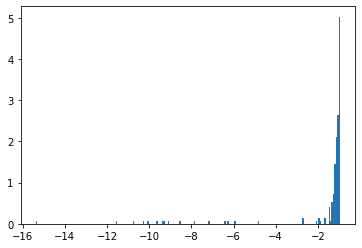

In [44]:
plt.hist(X_score, bins='auto', density = True);

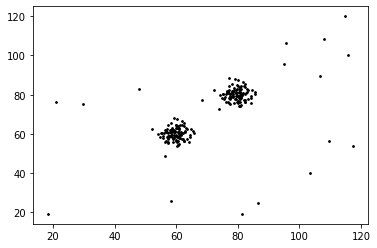

In [45]:
plt.scatter(X[:,0], X[:,1], color='k', s = 3, label='Observation Units');

In [46]:
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())

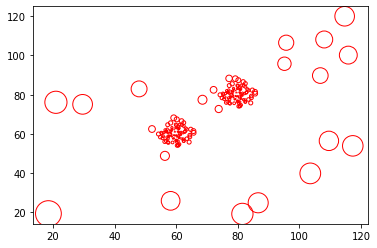

In [47]:
plt.scatter(X[:,0], X[:,1], s = 666 * radius, edgecolors='r',
            facecolors='none', label = 'LOF Scores');

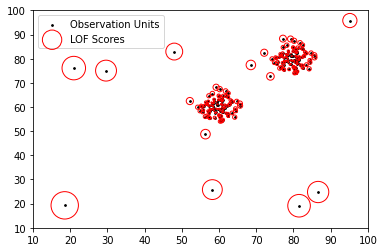

In [48]:
plt.scatter(X[:,0], X[:,1], color='k', s = 3, label='Observation Units')
plt.scatter(X[:,0], X[:,1], s = 750 * radius, edgecolors='r',
            facecolors='none', label = 'LOF Scores')
plt.xlim((10,100))
plt.ylim((10,100))

legend = plt.legend(loc = 'upper left')

In [51]:
np.sort(X_score)[0:9]

array([-15.3785652 , -11.57669644, -10.75276599, -10.24101046,
       -10.07364152,  -9.64406264,  -9.34229978,  -9.26256027,
        -9.06812573])

In [52]:
threshold = np.sort(X_score)[9]
threshold

-8.512759037993277

In [57]:
(X_score > threshold)[200:220]

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True])

In [58]:
TF_vector = (X_score > threshold)

In [62]:
X[(X_score < threshold)] #outliers

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [61]:
X[~TF_vector] # outlier observations

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

## Solving Outlier Observation Problem

In [64]:
df = X[X_score > threshold]
df[0:10]
# doing dataframe inliers way

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

In [65]:
df_X = X.copy()

In [68]:
# filling as their means way
np.mean(df_X[0])
np.mean(df_X[1])

83.25607759176307

In [70]:
outliers = df_X[~TF_vector]

In [71]:
outliers

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [72]:
outliers[:, :1]

array([[114.71331664],
       [117.35061431],
       [ 58.19203955],
       [ 81.50221621],
       [ 18.50752874],
       [109.59906448],
       [ 29.61195895],
       [103.54925861],
       [ 86.63240472],
       [ 20.94339793]])

In [73]:
outliers[:, :1] = np.mean(df_X[0])
outliers

array([[ 80.53767478, 120.02266354],
       [ 80.53767478,  53.86944304],
       [ 80.53767478,  25.80792308],
       [ 80.53767478,  19.13336149],
       [ 80.53767478,  19.29504171],
       [ 80.53767478,  56.42192376],
       [ 80.53767478,  75.05797491],
       [ 80.53767478,  39.81941816],
       [ 80.53767478,  24.81495847],
       [ 80.53767478,  76.10578263]])

In [74]:
outliers[:, 1:2] = np.mean(df_X[1])
outliers

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [76]:
df_X[~TF_vector] = outliers
df_X[~TF_vector]

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

In [77]:
df_X = X.copy()
df_X[~TF_vector]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [78]:
# Changing Outliers with Suppression

In [79]:
df_X[X_score == threshold]

array([[58.19203955, 25.80792308]])

In [80]:
df_X[~TF_vector] = df_X[X_score == threshold]

In [81]:
df_X[~TF_vector]

array([[58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308]])